<a href="https://colab.research.google.com/github/Grace663-08/cracking-the-market-code-with-ai-driven-stock-price-prediction-using-time-series-analysis-code/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data points: 80
Testing data points: 20

Model R-squared score on test data: 0.6119
Learned Intercept (c): 1.1429
Learned Slope (m): 1.7993

Prediction for X = 1.5: y = 3.8419
Training data points: 80
Testing data points: 20

Model R-squared score on test data: 0.6119
Learned Intercept (c): 1.1429
Learned Slope (m): 1.7993

Prediction for X = 1.5: y = 3.8419


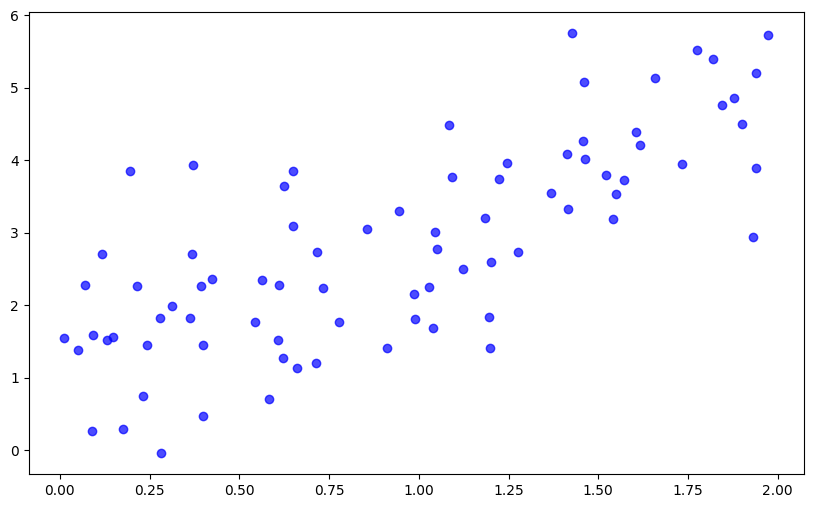

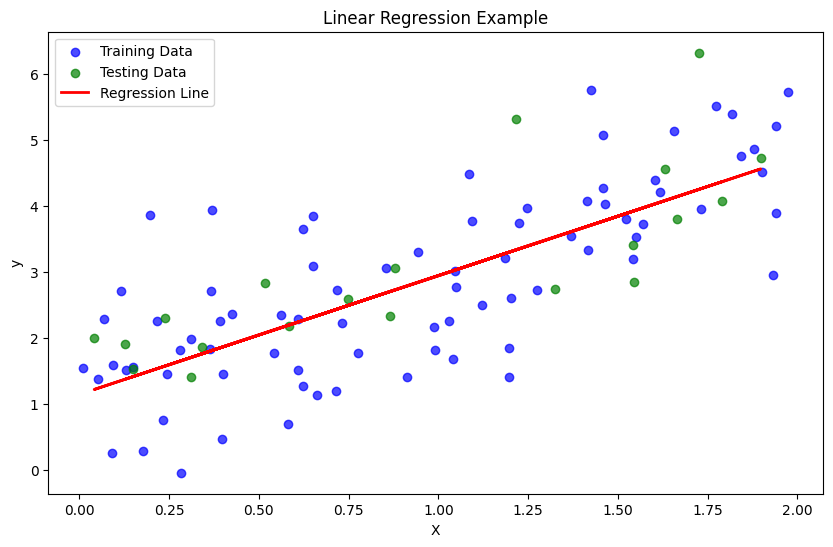

In [1]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- 1. Generate Synthetic Data ---
# We'll create data where y is approximately 2*x + 1 plus some random noise
# This simulates a real-world scenario where data isn't perfectly linear.

# Set a seed for reproducibility (so we get the same random numbers each time)
np.random.seed(42)

# Generate 100 data points for x from 0 to 10
X = 2 * np.random.rand(100, 1) # Feature (independent variable) - needs to be a 2D array for scikit-learn
# Generate y using the linear equation y = 1 + 2*x + noise
y = 1 + 2 * X + np.random.randn(100, 1) # Target (dependent variable)

# --- 2. Split Data into Training and Testing Sets ---
# It's good practice to train the model on one part of the data
# and test its performance on another part it hasn't seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% of the data will be used for testing

print(f"Training data points: {X_train.shape[0]}")
print(f"Testing data points: {X_test.shape[0]}")

# --- 3. Choose and Train the Model ---
# We'll use Linear Regression, a simple model that tries to fit a
# straight line (y = mx + c) to the data.
# The "AI" part is the model learning the best 'm' (slope) and 'c' (intercept)
# from the training data.

# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data (X_train, y_train)
# The .fit() method is where the learning happens
model.fit(X_train, y_train)

# --- 4. Evaluate the Model (Optional but Recommended) ---
# Let's see how well the model performs on the unseen test data
score = model.score(X_test, y_test)
print(f"\nModel R-squared score on test data: {score:.4f}")
# R-squared measures how well the regression line fits the data (1 is perfect fit)

# Print the learned parameters
print(f"Learned Intercept (c): {model.intercept_[0]:.4f}") # Should be close to 1
print(f"Learned Slope (m): {model.coef_[0][0]:.4f}")     # Should be close to 2

# --- 5. Make Predictions ---
# Now that the model is trained, we can use it to predict 'y' for new 'x' values.

# Let's predict the value for a new X value, e.g., X_new = 1.5
X_new = np.array([[1.5]]) # Needs to be a 2D array
y_pred = model.predict(X_new)

print(f"\nPrediction for X = {X_new[0][0]}: y = {y_pred[0][0]:.4f}")
# Based on our original equation (y = 1 + 2*x), we'd expect y around 1 + 2*1.5 = 4

# Predict on the test set to plot the regression line
y_pred_line = model.predict(X_test)

# --- 6. Visualize the Results ---
plt.figure(figsize=(10, 6))
# Plot the original training data points
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)
# Plot the original testing data points
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- 1. Generate Synthetic Data ---
# We'll create data where y is approximately 2*x + 1 plus some random noise
# This simulates a real-world scenario where data isn't perfectly linear.

# Set a seed for reproducibility (so we get the same random numbers each time)
np.random.seed(42)

# Generate 100 data points for x from 0 to 10
X = 2 * np.random.rand(100, 1) # Feature (independent variable) - needs to be a 2D array for scikit-learn
# Generate y using the linear equation y = 1 + 2*x + noise
y = 1 + 2 * X + np.random.randn(100, 1) # Target (dependent variable)

# --- 2. Split Data into Training and Testing Sets ---
# It's good practice to train the model on one part of the data
# and test its performance on another part it hasn't seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% of the data will be used for testing

print(f"Training data points: {X_train.shape[0]}")
print(f"Testing data points: {X_test.shape[0]}")

# --- 3. Choose and Train the Model ---
# We'll use Linear Regression, a simple model that tries to fit a
# straight line (y = mx + c) to the data.
# The "AI" part is the model learning the best 'm' (slope) and 'c' (intercept)
# from the training data.

# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data (X_train, y_train)
# The .fit() method is where the learning happens
model.fit(X_train, y_train)

# --- 4. Evaluate the Model (Optional but Recommended) ---
# Let's see how well the model performs on the unseen test data
score = model.score(X_test, y_test)
print(f"\nModel R-squared score on test data: {score:.4f}")
# R-squared measures how well the regression line fits the data (1 is perfect fit)

# Print the learned parameters
print(f"Learned Intercept (c): {model.intercept_[0]:.4f}") # Should be close to 1
print(f"Learned Slope (m): {model.coef_[0][0]:.4f}")     # Should be close to 2

# --- 5. Make Predictions ---
# Now that the model is trained, we can use it to predict 'y' for new 'x' values.

# Let's predict the value for a new X value, e.g., X_new = 1.5
X_new = np.array([[1.5]]) # Needs to be a 2D array
y_pred = model.predict(X_new)

print(f"\nPrediction for X = {X_new[0][0]}: y = {y_pred[0][0]:.4f}")
# Based on our original equation (y = 1 + 2*x), we'd expect y around 1 + 2*1.5 = 4

# Predict on the test set to plot the regression line
y_pred_line = model.predict(X_test)

# --- 6. Visualize the Results ---
plt.figure(figsize=(10, 6))
# Plot the original training data points
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)
# Plot the original testing data points
plt.scatter(X_test, y_test, color='green', label='Testing Data', alpha=0.7)
# Plot the regression line learned by the model using test data points
plt.plot(X_test, y_pred_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()
